# Quick Webb Photometry Sample Notebook #

This notebooks relies on the quickwebb set of routines to do a quick and dirty photometry analysis.

The QuickWebb module has the following functions.
- webbcrawl: Get info about files in a directory
- photnow: Do quick and dirty aperture photometry

This notebook also makes use of the jdaviz Imviz tool for designing the aperture for the photometry.

In [1]:
import quickwebb as qw
%matplotlib inline

## Step 1: Crawl through a directory to get info on each data file

In [2]:
files = qw.webbcrawl('/Users/smullally/jwst/simulated_data/ngc346-mosaic/')

  INSTRUME MODULE  DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM
0   NIRCAM      A  NRCALONG  F444W  CLEAR  536.8385     FULL  UNKNOWN      34
1   NIRCAM      A     NRCA1  F115W  CLEAR  536.8385     FULL  UNKNOWN      34


In [3]:
#Notice that files also contains the path for easy access
print(files)

  INSTRUME MODULE  DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM  \
0   NIRCAM      A  NRCALONG  F444W  CLEAR  536.8385     FULL  UNKNOWN      34   
1   NIRCAM      A     NRCA1  F115W  CLEAR  536.8385     FULL  UNKNOWN      34   

                                                                                              PATH  
0  /Users/smullally/jwst/simulated_data/ngc346-mosaic/Pipeline_Level3/ngc346-f444w-mosaic_i2d.fits  
1  /Users/smullally/jwst/simulated_data/ngc346-mosaic/Pipeline_Level3/ngc346-f115w-mosaic_i2d.fits  


In [4]:
from jdaviz import Imviz
imviz = Imviz()
imviz.app


Application(config='imviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'des…

In [5]:
imviz.load_data(files['PATH'][0])

In [6]:
regions = imviz.get_interactive_regions()
regions

{'Subset 1': <CirclePixelRegion(center=PixCoord(x=1189.960693359375, y=3505.033935546875), radius=74.96807861328125)>,
 'Subset 2': <CirclePixelRegion(center=PixCoord(x=1476.645751953125, y=3673.75830078125), radius=20.7113037109375)>,
 'Subset 3': <CirclePixelRegion(center=PixCoord(x=975.81982421875, y=3009.541015625), radius=17.759796142578125)>}

Subset 1


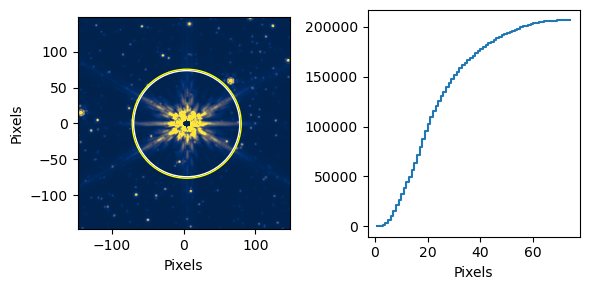

Aper. Photometry: 206446.192 +/-   157.419
Subset 2


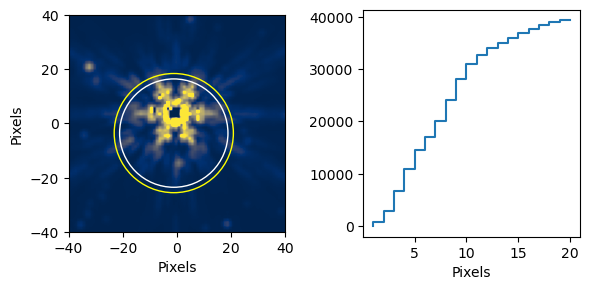

Aper. Photometry: 39313.866 +/-   195.965
Subset 3


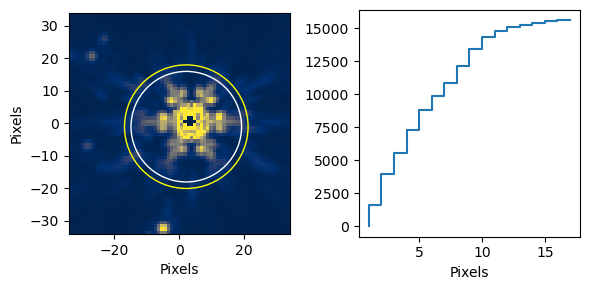

Aper. Photometry: 15601.214 +/-    60.952


In [7]:
regions['Subset 1'].center.xy
for subset in regions.keys():
    print(subset)
    photometry, cutout, cen = qw.photnow(files['PATH'][0], regions[subset].center.xy, radii_pixels=int(regions[subset].radius))

In [8]:
photometry

array([3.67706083e+00, 1.62080994e+03, 3.96532457e+03, 5.56780231e+03,
       7.27752427e+03, 8.82964415e+03, 9.85711242e+03, 1.08423746e+04,
       1.21431361e+04, 1.34417589e+04, 1.43316743e+04, 1.48228246e+04,
       1.50995024e+04, 1.52701256e+04, 1.54097305e+04, 1.55318685e+04,
       1.56012135e+04])